In [1]:
#UNZIP THE ZIPPED FOLDER 
import zipfile
import os
import pandas as pd

# Step 1: Unzip the file
with zipfile.ZipFile("netflix_data.zip", 'r') as zip_ref:
    zip_ref.extractall("netflix_data")

In [2]:
#RENAME THE FILE 
# # Step 2: Define original and new file paths
original_path = os.path.join("netflix_data", "netflix_data.csv")
new_path = os.path.join("netflix_data", "Netflix_shows_movies.csv")

# Step 3: Rename the file
if os.path.exists(original_path):
    os.rename(original_path, new_path)
    print(f"File renamed to: {new_path}")
else:
    print("Original file not found. Please check the filename.") #crosscheck your file path, and correct the file name in the code if needed

File renamed to: netflix_data\Netflix_shows_movies.csv


In [3]:
# Load the renamed dataset
df = pd.read_csv("netflix_data/Netflix_shows_movies.csv")  

# Show the first 5 rows
print(df.head())

    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

In [4]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [5]:
# DATA PREPARATION AND CLEANING

# Replace nulls in all columns except 'rating' and 'date_added' with 'Unknown'
for column in df.columns:
    if column not in ['rating', 'date_added']:
        df.fillna({column: 'Unknown'}, inplace=True)

# Replace nulls in 'rating' with the mode(most frequent value)
rating_mode = df['rating'].mode()[0]
df.fillna({'rating':rating_mode}, inplace=True)

# Check updated null values
print("Updated null values per column:")
print(df.isnull().sum())

Updated null values per column:
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      11
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


In [6]:
# Exploratory Data Analysis (EDA)(Initial Overview)

# 1. General Info
print("--- INITIAL OVERVIEW ---")
print(df.info())

# 2. Value Counts for Categorical Columns
print("\n--- TYPE DISTRIBUTION ---")
print(df['type'].value_counts())

print("\n--- RATING DISTRIBUTION ---")
print(df['rating'].value_counts())

print("\n--- TOP 10 COUNTRIES ---")
print(df['country'].value_counts().head(10))

print("\n--- TOP 10 LISTED IN ---")
print(df['listed_in'].value_counts().head(10))

print("\n--- RELEASE YEAR DISTRIBUTION ---")
print(df['release_year'].value_counts().sort_index())

--- INITIAL OVERVIEW ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      6234 non-null   object
 4   cast          6234 non-null   object
 5   country       6234 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None

--- TYPE DISTRIBUTION ---
type
Movie      4265
TV Show    1969
Name: count, dtype: int64

--- RATING DISTRIBUTION ---
rating
TV-MA       2037
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR         

In [7]:
# DETAILED EDA AND DATA PREPARATION
# 1. Release year analysis
# Group release year by decades
# Define bins and labels
bins = list(range(1921, 2001, 10)) + [2001]  # Add upper bound
labels = [f"{start}-{start+9}" for start in range(1921, 2000, 10)]
decade_counts = pd.cut(df['release_year'], bins=bins, labels=labels, right=False).value_counts().sort_index()

# Display count by release decade
print("\n--- DECADE OF RELEASE ---")
print(decade_counts)

# 2. Country Analysis
#  Count by country
# Split countries into individual entries
df_countries = df['country'].str.split(', ').explode()
print("\n--- NO OF MOVIES AVAILABLE BY COUNTRY ---")
print(df_countries.value_counts())

# 3. Count by type (Movie/TV Show)
print("\n--- COUNT BY TYPE ---")
print(df['type'].value_counts())

# 4. Genre Analysis
# Split genres into individual entries
df_genres = df['listed_in'].str.split(', ').explode()
print("\n--- COUNT BY GENRE ---")
print(df_genres.value_counts())
# Most and least common genres
print("Most common genre:", df_genres.mode()[0])
print("Least common genre:", df_genres.value_counts().idxmin())

# 5. Ratings Analysis 
# Count by rating
print("\n--- COUNT BY RATING ---")
print(df['rating'].value_counts())
# Most and least common ratings
print("Most common rating:", df['rating'].mode()[0])
print("Least common rating:", df['rating'].value_counts().idxmin())

# 6. Duration Analysis
# Filter only movies from the data
movies_df = df[df['type'] == 'Movie'].copy()
#Extract numeric duration in minutes
movies_df['duration_minutes'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)

# Calculate average duration
average_duration = movies_df['duration_minutes'].mean()
print(f"Average movie duration: {average_duration:.2f} minutes")
# Find shortest movie
shortest_movie = movies_df.loc[movies_df['duration_minutes'].idxmin()]
print(f"Shortest movie: {shortest_movie['title']} - {shortest_movie['duration_minutes']:.0f} minutes")
# Find longest movie
longest_movie = movies_df.loc[movies_df['duration_minutes'].idxmax()]
print(f"Longest movie: {longest_movie['title']} - {longest_movie['duration_minutes']:.0f} minutes")

# 6. Other Insights
print("\n--- OTHER INSIGHTS ---")
print("Most common release year:", df['release_year'].mode()[0])
print("Least common release year:", df['release_year'].value_counts().idxmin())

print("Earliest release year:", df['release_year'].min())
print("Latest release year:", df['release_year'].max())

print("Most common country:", df_countries.mode()[0])



--- DECADE OF RELEASE ---
release_year
1921-1930      1
1931-1940      0
1941-1950     15
1951-1960     10
1961-1970     18
1971-1980     62
1981-1990     97
1991-2000    207
Name: count, dtype: int64

--- NO OF MOVIES AVAILABLE BY COUNTRY ---
country
United States     2609
India              838
United Kingdom     601
Unknown            476
Canada             318
                  ... 
Bermuda              1
Ecuador              1
Syria                1
Kuwait               1
Cyprus               1
Name: count, Length: 114, dtype: int64

--- COUNT BY TYPE ---
type
Movie      4265
TV Show    1969
Name: count, dtype: int64

--- COUNT BY GENRE ---
listed_in
International Movies            1927
Dramas                          1623
Comedies                        1113
International TV Shows          1001
Documentaries                    668
TV Dramas                        599
Action & Adventure               597
Independent Movies               552
TV Comedies                      436
Th

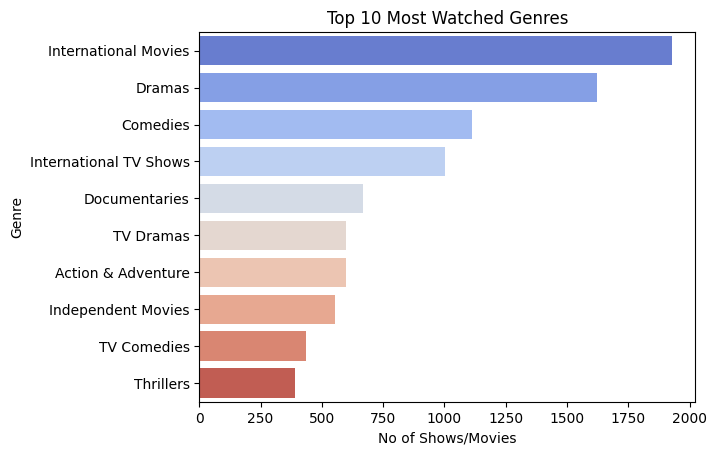

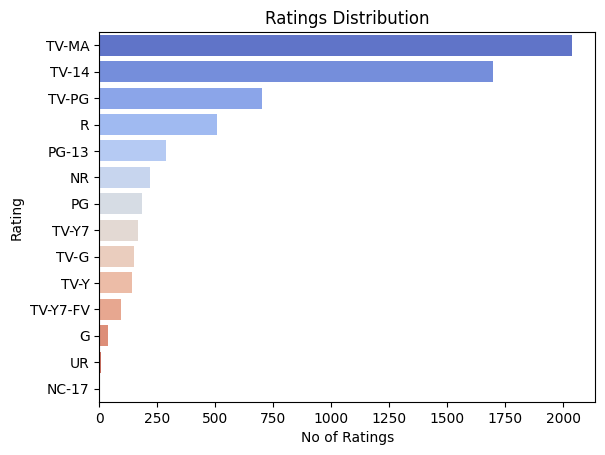

In [8]:
# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# Most Watched Genres
df_genres = df['listed_in'].str.split(', ').explode()
genre_counts = df_genres.value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Count']

sns.barplot(data=genre_counts, x='Count', y='Genre', hue='Genre', palette='coolwarm', legend=False)
plt.title('Top 10 Most Watched Genres')
plt.xlabel('No of Shows/Movies')
plt.ylabel('Genre')
plt.show()

# Ratings Distribution
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

sns.barplot(data=rating_counts, x='Count', y='Rating', hue='Rating', palette='coolwarm', legend=False)
plt.title('Ratings Distribution')
plt.xlabel('No of Ratings')
plt.ylabel('Rating')
plt.show()